### Задание 1
Напишите код, моделирующий выпадение поля в рулетке с учетом поля зеро.

In [1]:
import numpy as np

In [2]:
for _ in range(5):
    #input()
    x = np.random.randint(37)  # От 0 до 36 целые числа
    if x == 0:
        print('Зеро')
    elif (x < 19):  # Будем считать числа от 1 до 18 красными. Нам важно только их количество
        print('Красное')
    else:
        print('Черное')

Черное
Черное
Красное
Черное
Черное


### Задание 2
1) Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере рулетки.<br>
2) Сгенерируйте десять выборок случайных чисел $x_0, … x_9$.<br>
и постройте гистограмму распределения случайной суммы $x_0+x_1+…+x_9$.

#### Решение
Проверим вероятность выпадения шарика на красное в рулетке два раза подряд. Вероятность выпадения на красное $p = \frac{18}{37}$. По теореме умножения вероятность выпадения на красное дважды подряд: $p \cdot p={(\frac{18}{37})}^2$. Проверим это:

In [3]:
i = 0  # Количество выпадений на красное два раза подряд
for n in range(10000):
    x = np.random.randint(37)
    y = np.random.randint(37)
    if x > 18 and y > 18:
        i = i + 1
print(f'Ожидаемая вероятность: {(18/37)**2}')
print(f'Доля ожидаемого события от общего числа: {i/n}')

Ожидаемая вероятность: 0.23666910153396642
Доля ожидаемого события от общего числа: 0.24302430243024303


Полученные значения равны с небольшой погрешностью

### Задание 3
1) Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей через биномиальное распределение и сравните результаты.<br>
2) Повторите расчеты биномиальных коэффициентов и вероятностей $k$ успехов в последовательности из $n$ независимых испытаний, взяв другие значения $n$ и $k$.

1) Монету бросают 4 раза. Считаем вероятность выпадения орла и решки поровну по 2 раза методом Монте-Карло, используя 1000 повторений, и через $C_n^k$

In [4]:
from scipy.special import comb

In [5]:
k, n = 2, 4
repeats = 1000
samples = [np.random.randint(0, 2, repeats) for _ in range(n)]
samples_sum = sum(samples)
successes = sum(samples_sum == k)
frequency = successes / repeats
frequency

0.379

In [6]:
probability = comb(n, k) / 2 ** n
probability

0.375

Вероятность, полученная методом Монте-Карло, близка к вероятности, полученной аналитическим путем.

2) Повторим все то же для $k = 3, n = 6$

In [7]:
k, n = 3, 6
samples = [np.random.randint(0, 2, repeats) for _ in range(n)]
samples_sum = sum(samples)
successes = sum(samples_sum == k)
frequency = successes / repeats
probability = comb(n, k) / 2 ** n
print(f'Частота выпадения 3-х орлов из шести бросков: {frequency}')
print(f'Теоретическая вероятность этого события: {probability}')

Частота выпадения 3-х орлов из шести бросков: 0.287
Теоретическая вероятность этого события: 0.3125


И вновь вероятность, полученная методом Монте-Карло, близка к вероятности, полученной аналитическим путем.

### Задание 4
Из урока по комбинаторике повторите расчеты, сгенерировав возможные варианты перестановок и сочетаний для других значений $n$ и $k$.

#### Решение

In [8]:
from itertools import permutations as perm
from itertools import combinations as comb

In [9]:
n, k = 3, 2

In [10]:
for c in perm([i for i in range(n)], k):
    print(*c)

0 1
0 2
1 0
1 2
2 0
2 1


In [11]:
for c in comb([i for i in range(n)], k):
    print(*c)

0 1
0 2
1 2


### Задание 5
Дополните код расчетом линейного коэффициента корреляции $x$ и $y$ по формуле:

$$R=\frac{\sum_{i=0}^{n}\left(x_{i}-\overline{x}\right)\left(y_{i}-\overline{y}\right)}{\sqrt{\sum_{i=0}^{n}\left(x_{i}-\overline{x}\right)^{2} \sum_{i=0}^{n}\left(y_{i}-\overline{y}\right)^{2}}}$$

In [12]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

0.6483336670999786 0.16471365339469404
0.648333667099979 0.1647136533946938


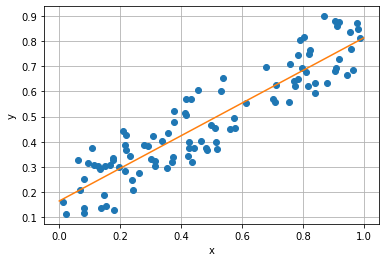

In [13]:
n = 100
r = 0.7
x = np.random.rand(n)
y = r * x + (1 - r) * np.random.rand(n)
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

a = (np.sum(x) * np.sum(y) - n * np.sum(x * y)) / (np.sum(x) * np.sum(x) - n * np.sum(x * x))
b = (np.sum(y) - a * np.sum(x)) / n

A = np.vstack([x, np.ones(len(x))]).T
a1, b1 = np.linalg.lstsq(A, y)[0]
print(a, b)
print(a1, b1)

plt.plot([0, 1], [b, a + b]);

In [14]:
c = np.corrcoef(x, y)
print(c)

[[1.         0.91657963]
 [0.91657963 1.        ]]


#### Решение:

In [15]:
def R(x, y):
    return ((x - x.mean()) * (y - y.mean())).sum() / np.sqrt(((x - x.mean()) ** 2).sum() * ((y - y.mean()) ** 2).sum())

In [16]:
print(R(x,y))

0.9165796266846189


Можно сравнить наш коээфициент с коэффициентом из матрицы выше. Он один и тот же с точностью до 8 знаков после запятой